## GIS 5572 Lab 3 Notebook 3

In the 2nd notebook, I ran the Exploratory Interpolation Tool, which identified the top tools (I assume the most accurate, based on RMSE. These were Simple Kriging and Universial Kriging.

For this notebook, I will run the Simple Kriging tool

In [1]:
import arcpy
import requests
import json

In [2]:
arcpy.env.workspace = r'Z:\Helpdesk\Shana\GIS 5572\5572Lab3'

### Choosing Simple Kriging
When looking at documentation about Simple Kriging, (https://pro.arcgis.com/en/pro-app/3.1/tool-reference/spatial-analyst/kriging.htm), it references that Empirical Baysian Kriging is better. I did that in the first notebook as my first test. Since the Exploratory Interpolation Tool suggested Simple Kriging, I am doing that now.

In [ ]:
# Run with the Geoprocessing tools
out_surface_raster = arcpy.sa.Kriging(
    in_point_features="projected",
    z_field="max_tmpf",
    semiVariogram_props="Spherical 2219.396612 # # #",
    cell_size=2219.3966124,
    search_radius="VARIABLE 12",
    out_variance_prediction_raster=None
)
out_surface_raster.save(r"Z:\Helpdesk\Shana\GIS 5572\5572Lab3\5572Lab3.gdb\Kriging_proj1")

In [7]:
in_point_features = "projected"
z_field = "max_tmpf"
semiVariogram_props="Spherical 2219.396612 # # #"

Kriging_2 = arcpy.sa.Kriging(in_point_features, z_field, semiVariogram_props)

In [9]:
## Running again to save to the .sde

# Run with the Geoprocessing tools
out_surface_raster = arcpy.sa.Kriging(
    in_point_features="projected",
    z_field="max_tmpf",
    semiVariogram_props="Spherical 2219.396612 # # #",
    cell_size=2219.3966124,
    search_radius="VARIABLE 12",
    out_variance_prediction_raster=None
)
out_surface_raster.save(r"Z:\Helpdesk\Shana\GIS 5572\5572Lab3\35.224.112.3.sde\Kriging_proj3")

TypeError: Kriging() got an unexpected keyword argument 'semiVariogram_props'

### Can't write to the .sde apparently

And... of course I can't because you can't use raster with SQL. Right?

See below for resampleing

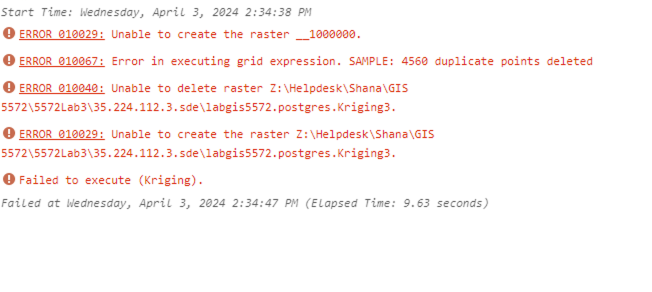

## Compare Rasters

In [ ]:
## I ran a Raster Compare to see if there was a difference. Here's the Geoprocessing code:
arcpy.management.RasterCompare(
    in_base_raster="Kriging_2",
    in_test_raster="Kriging_proj1",
    compare_type="RASTER_DATASET",
    ignore_option=None,
    continue_compare="NO_CONTINUE_COMPARE",
    out_compare_file=r"Z:\Helpdesk\Shana\GIS 5572\5572Lab3\compare.txt",
    parameter_tolerances=None,
    attribute_tolerances=None,
    omit_field=None
)

In [8]:
## Writing the code on my own:
compare2 = arcpy.management.RasterCompare('Kriging_2', 'Kriging_proj1')

## apparently this worked but I can't find it....

### Result from Geoprocessing tool

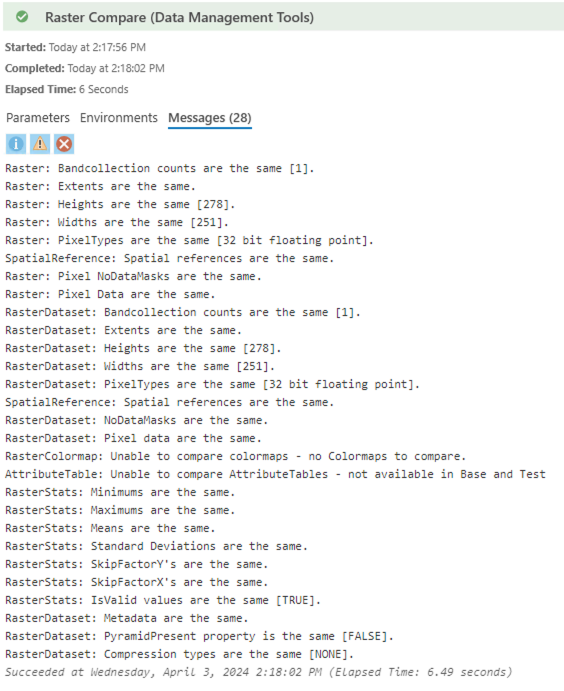

## Raster to Point



In [ ]:
arcpy.conversion.RasterToPoint(
    in_raster="Kriging_2",
    out_point_features=r"Z:\Helpdesk\Shana\GIS 5572\5572Lab3\5572Lab3.gdb\RasterT_Kriging1",
    raster_field="Value"
)

In [ ]:
## Tried to save to the .sde. This did not work - it froze Pro up.

arcpy.conversion.RasterToPoint(
    in_raster="Kriging_2",
    out_point_features=r"Z:\Helpdesk\Shana\GIS 5572\5572Lab3\35.224.112.3.sde\RasterT_Kriging2",
    raster_field="Value"
)